# Data Exploration : Evaluation

Lucas Thiolas

In this project, we will first load and explore a dataset containing informations about music tracks. Based on this exploration we will then clean this dataset to extract the informations we will use to to train a model classifying music classes in function of different parameters.

## 1 Load and explore dataset

### 1.1 Extraction 

We start by importing the database :

In [1]:
# We import the pandas library
import pandas as pd
import matplotlib.pyplot as plt 

path = "D:/isae/cours/programmes_python/aibt/01_data_exploration/evaluation/music_genre_dataset.csv"#path to the database
raw_data = pd.read_csv(path)                                                                                                           # we load the database
pd.DataFrame.head(raw_data)                                                                                                          # verification 

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10


By looking at a sample of the database, we can see that some features contain NaN values. Others contain text. We can also speculate that the target of learning will be the class feature.
In this section we will analize its content to assess what operations will need to be done to use this dataset.

### 1.2 Exploration

We will first find the amount of samples and features of the dataset:

In [2]:
samples, features = raw_data.shape
print("there are "+ str(features)+ " features and " +str(samples)+ " samples")

there are 17 features and 17996 samples


In this dataset, we are trying to predict the music classes. So we will first extract the music class distribution inside the dataset

Text(0.5, 1.0, 'Class distribution in the dataset')

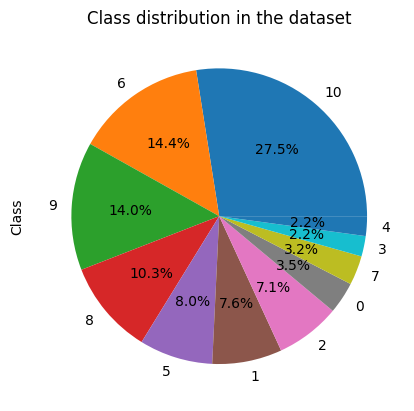

In [3]:
# Class distribution
Class = raw_data["Class"].value_counts()

Class.plot.pie(autopct='%1.1f%%')
plt.title("Class distribution in the dataset")

As we can see on the graph, the music classes are very unequally represented. This may cause problems in the training as this could possibly lead to biases.

We will now identify the amount of NaN in each feature and the amount of samples containig NaN values :


 number of samples with Nan values 
 6183


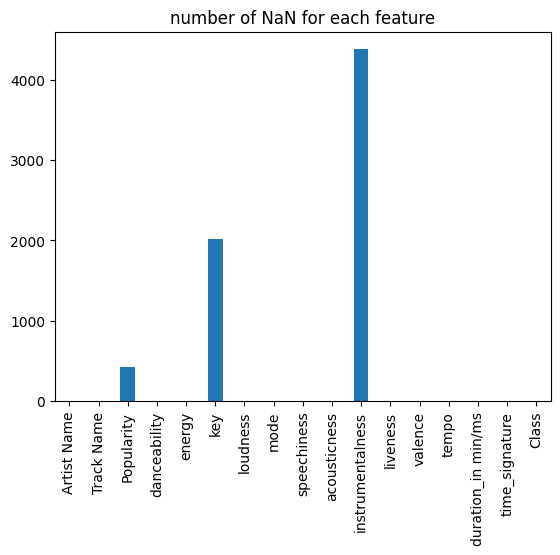

In [4]:
# number of Nan in each feature
NaN_feature = raw_data.isna().sum(axis=0)
plot = NaN_feature.plot.bar()
plt.title("number of NaN for each feature")

# number of samples with Nan values
NaN_sample = sum(raw_data.isna().any(axis=1))
print("\n number of samples with Nan values \n", NaN_sample)

We can see that out of the 17996 samples, a third (6183) contain NaN values. We can also see that two categories contain most of the NaN (key and instrumentalness) while popularity only contains 428 NaN.

Based on that analysis, to clean this database and keep as much data as possible, we should remove the key and instrumentallness categories entirely and keep the popularity column. We should then remove the samples containing a NaN for this column.

We will now analyze the types of data for each column to see which one we will have to remove (eg : string data).


 type counts :
  float64    12
int64       3
object      2
dtype: int64


non numerical feature : Artist Name
non numerical feature : Track Name


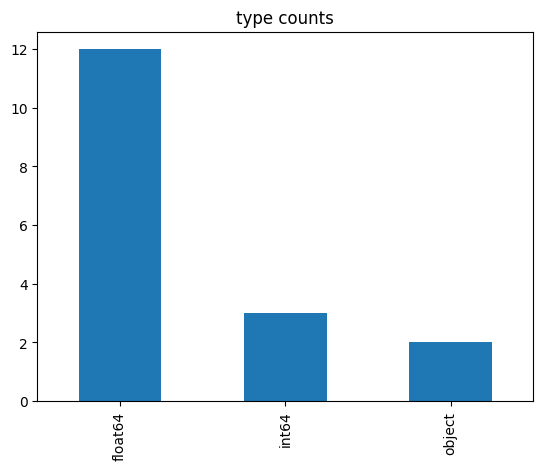

In [5]:
# We get each feature's type
feature_types = raw_data.dtypes
# We count each type's quantity
types_counts = feature_types.value_counts()
print("\n type counts :\n ", types_counts)
#Graph of type quantities
plot = types_counts.plot.bar()
plt.title("type counts")
print("\n")

# non numerical feature
for feature in raw_data:
    types = raw_data[feature].dtypes
    if types == object:
        print("non numerical feature :", feature)

By looking at the results, we know that the "artist name" and "track name" will have to be removed due to their type.

### 1.3 Conclusion

- The "artist name", "track name", "key", "instrumentallness" features will be removed.
- The samples containing NaN values for popularity will be removed.
- The "class" category will be isolated as the target.
- We should end up with a 13 features dataset (including the target) and 17568 samples

I think this solution is the best. Only removing samples would leave us with only 11813 samples which is drastic. Only removing features would make us lose a lot of data from the "popularity" feature only because 423 samples, which would reduce the performance of our model.

## 2 Simple processing

Based on the previous exploration, we will modify the dataset so it can be used for machine learning following the conclusion (1.3), we will also separate the database in 3 :
- learning database
- test database

### 2.1 Non numerical variables removal

We will first remove the "artist name" and "track name" features:

In [6]:
# function used to isolate numerical features
def divide_numbers_strings(data: pd.DataFrame):
    numerical_features = data.select_dtypes(include='number')
    text_features = data.select_dtypes(include='object')
    return numerical_features, text_features  # TODO

# We call that function
numbers_data, string_data = divide_numbers_strings(raw_data)

# We check the new dimensions
print("dimensions database without str :\n",numbers_data.shape)

# Verification
pd.DataFrame.head(numbers_data)   

dimensions database without str :
 (17996, 15)


,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10


As we can see the 2 features containing non numerical data have been removed, passing from 17 features to 15.

### 2.2 NaN removal

We take the numerical only database found previously, and we use the strategy in 1.3. To do so, we first remove the features containing NaN for more than 10% of the samples, and then remove all the samples containing the remaining NaN :

In [7]:
# Function removing NaN 
def remove_nan(data: pd.DataFrame)->(pd.DataFrame):
    # We copy the dataframe so not to alter it
    mat = data.copy()
    # We extract the limit at which we remove a feature (15% of the samples)
    samples,features = mat.shape
    limit = samples*0.10
    
    # Removes the features containing NaN for more than 15% of the samples 
    for feature in mat:        
        if sum(mat[feature].isna()) > limit:
            mat.pop(feature)
        
    # Removes the samples with the remaining NaN
    mat = mat.dropna(axis=0)
    return mat

#we call the function
clean_data = remove_nan(numbers_data)  
# We check the new dimensions
print("dimensions database without NaN :\n",clean_data.shape)

# Verification
pd.DataFrame.head(clean_data)   

dimensions database without NaN :
 (17568, 13)


,Popularity,danceability,energy,loudness,mode,speechiness,acousticness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,60.0,0.854,0.564,-4.964,1,0.0485,0.017100,0.0849,0.8990,134.071,234596.0,4,5
1,54.0,0.382,0.814,-7.230,1,0.0406,0.001100,0.1010,0.5690,116.454,251733.0,4,10
2,35.0,0.434,0.614,-8.334,1,0.0525,0.486000,0.3940,0.7870,147.681,109667.0,4,6
3,66.0,0.853,0.597,-6.528,0,0.0555,0.021200,0.1220,0.5690,107.033,173968.0,4,5
4,53.0,0.167,0.975,-4.279,1,0.2160,0.000169,0.1720,0.0918,199.060,229960.0,4,10


By looking at the verifications, we can see that the "key" and "instrumentallness" have been removed, however the popularity feature is still here.
The dimensions also match our predictions.
Before continuing, here is a series of graphs detailing the distribution of the data that will be used for training.

,Popularity,danceability,energy,loudness,mode,speechiness,acousticness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
count,17568.000000,17568.000000,17568.000000,17568.000000,17568.000000,17568.000000,17568.000000,17568.000000,17568.000000,17568.000000,1.756800e+04,17568.000000,17568.000000
mean,44.512124,0.543483,0.664213,-7.888350,0.635474,0.079779,0.245085,0.196442,0.486749,122.674762,2.027774e+05,3.924636,6.719775
std,17.426928,0.166519,0.234331,4.011382,0.481311,0.083628,0.309378,0.159792,0.239917,29.556390,1.110922e+05,0.361226,3.188607
min,1.000000,0.059900,0.000020,-36.214000,0.000000,0.022500,0.000000,0.011900,0.018300,30.557000,5.016500e-01,1.000000,0.000000
25%,33.000000,0.431000,0.512000,-9.509250,0.000000,0.034875,0.004290,0.097300,0.298000,99.676500,1.681138e+05,4.000000,5.000000
50%,44.000000,0.545500,0.701000,-7.013000,1.000000,0.047500,0.079850,0.129000,0.482000,120.069000,2.099500e+05,4.000000,8.000000
75%,56.000000,0.660000,0.861000,-5.183000,1.000000,0.083000,0.428000,0.258000,0.673000,141.989500,2.530792e+05,4.000000,10.000000
max,100.000000,0.989000,1.000000,1.355000,1.000000,0.955000,0.996000,1.000000,0.986000,217.416000,1.477187e+06,5.000000,10.000000


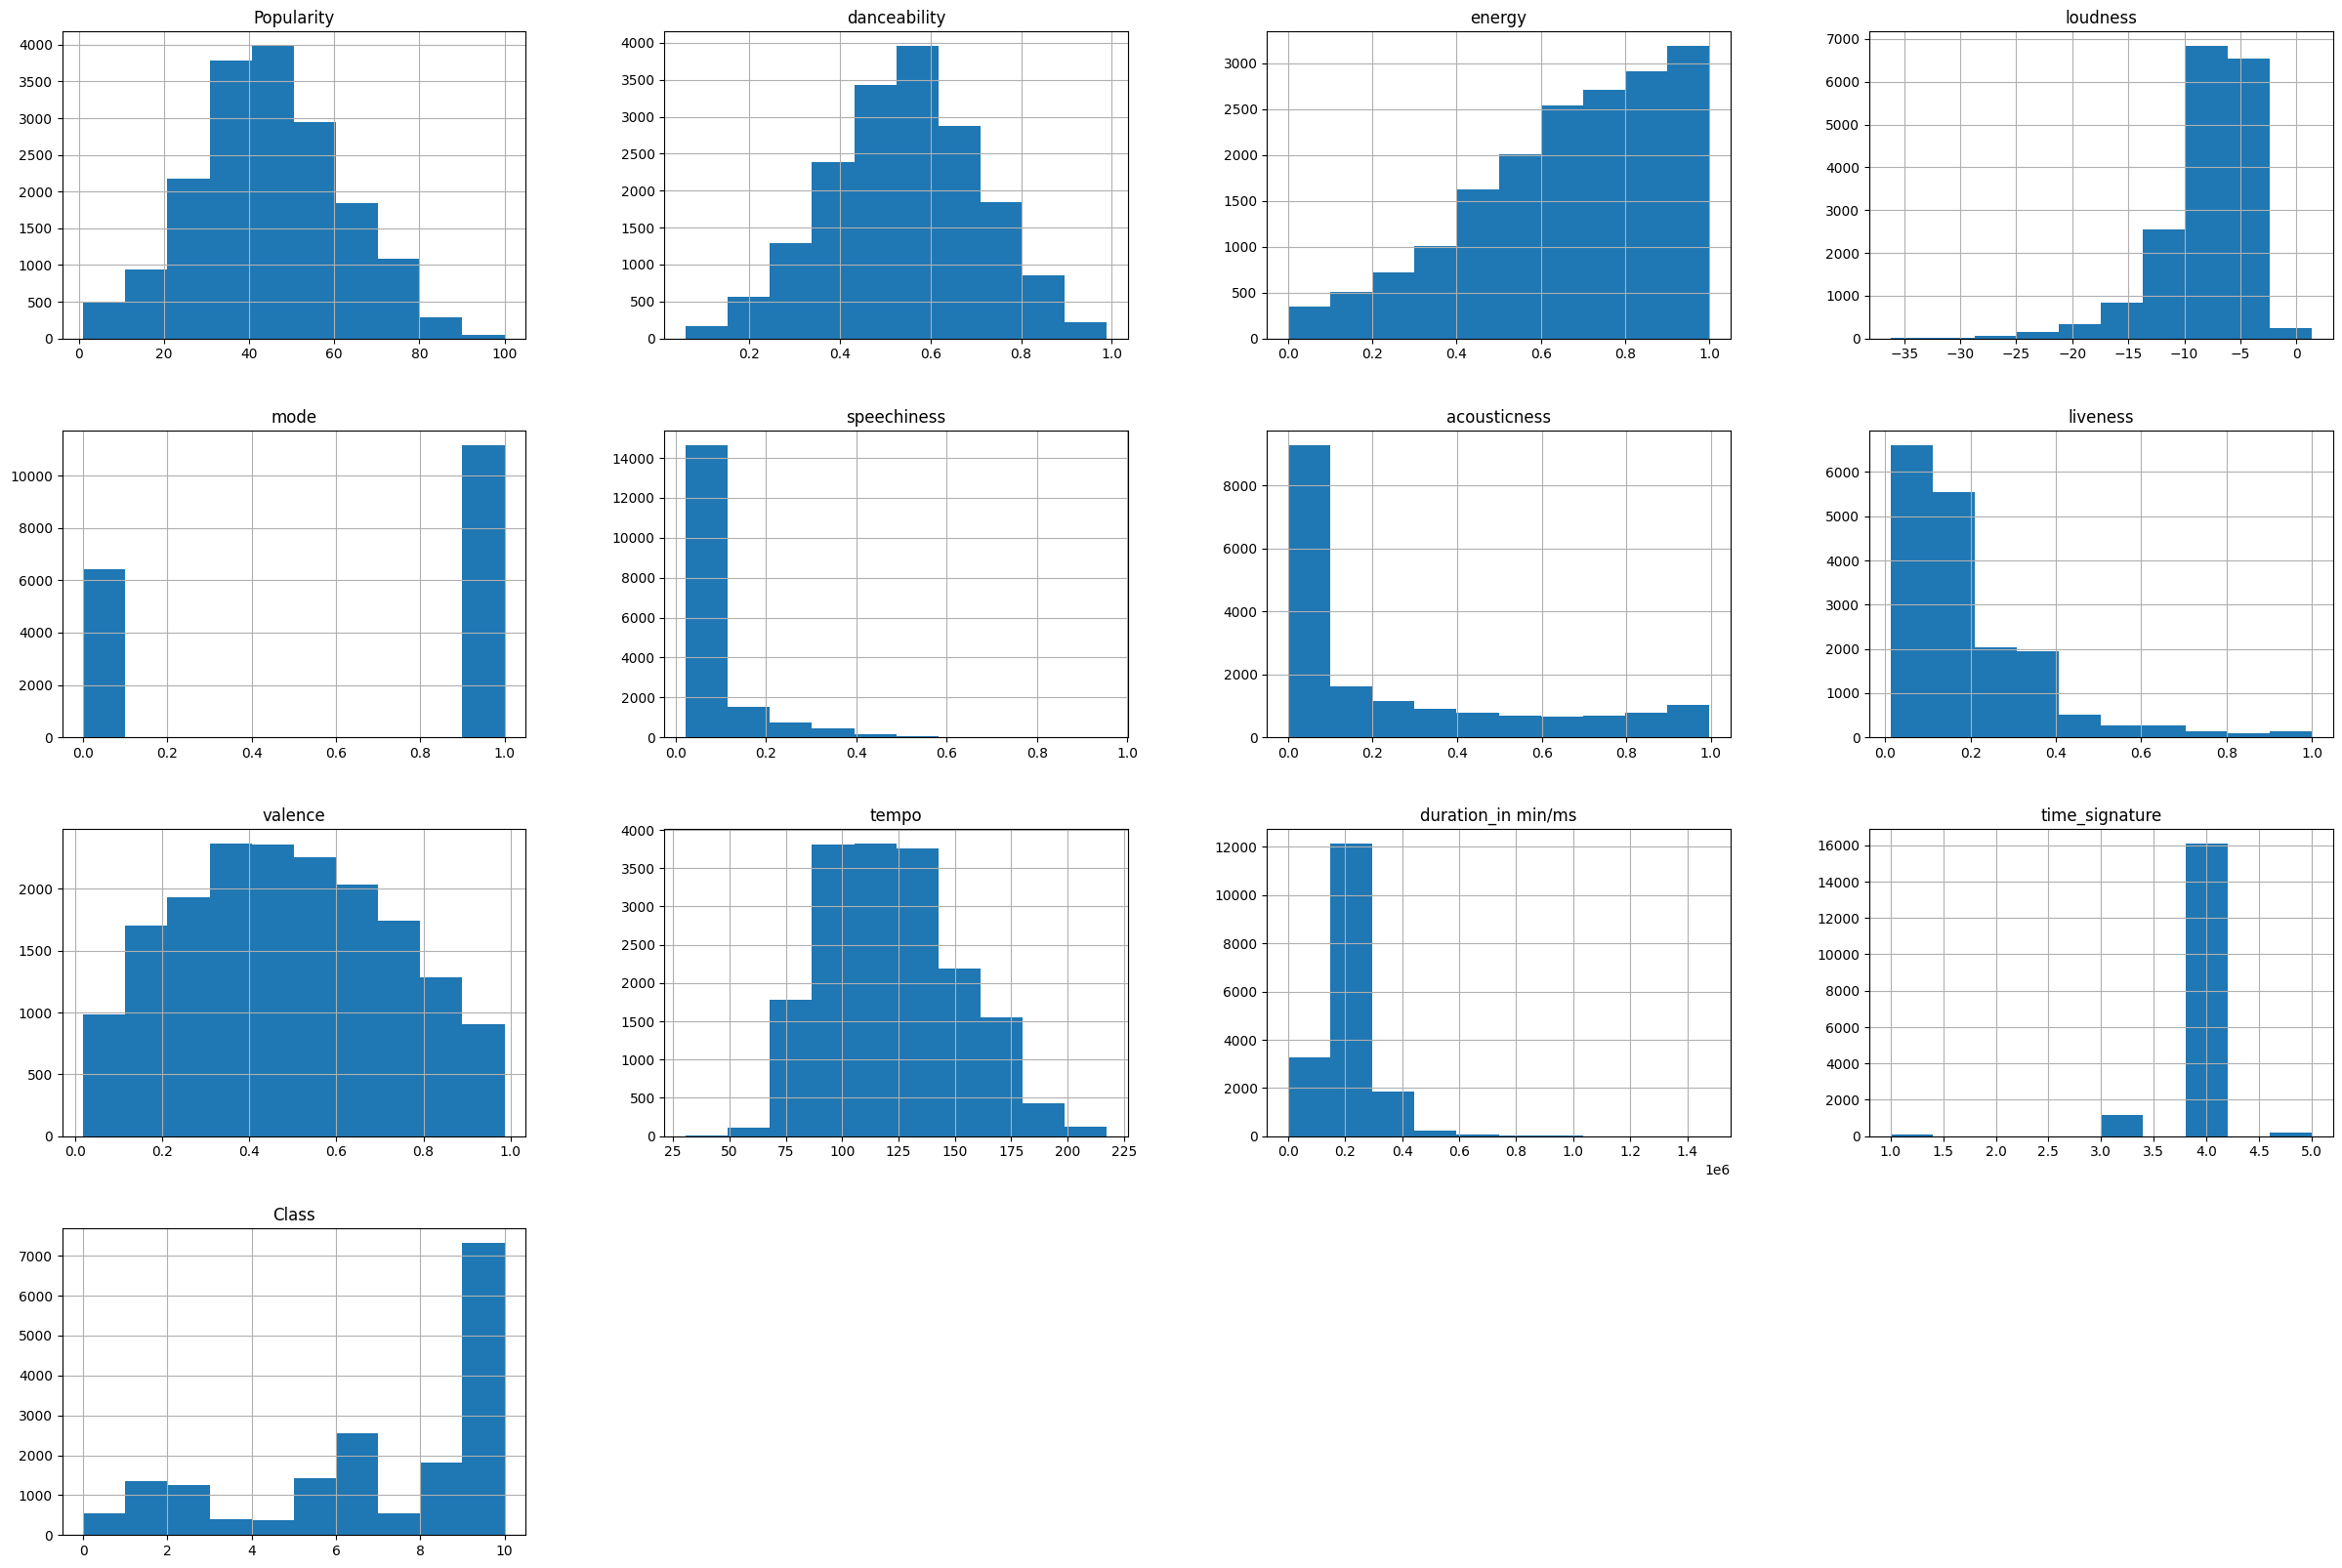

In [8]:
# Histogram
clean_data.hist(figsize=(30, 20))

# Statistices
clean_data.describe()

We can see that a lot of the the different features are poorly distributed. We can see some values beeing ten times more represented than others like for acousticeness or not ne represeted at all like in time signature.
This bad distribution is likely to cause strong biases resulting in a poor performance of the model.

### 2.3 Separation of the dataset

Now that we have a clean dataset, we can separate it into a "train" and "test" dataset. We do it so 30% of the dataset can be used for test.
We should end up with roughly 12300 train samples and 5300 test samples.

In [9]:
# We import the required library
from sklearn.model_selection import train_test_split

# We split the dataset
taux = 0.3
data_train, data_test = train_test_split(clean_data, test_size=taux)

# Dimension verification
print(data_train.shape[0],data_test.shape[0], "\n are equivalent to \n", clean_data.shape[0]*(1-taux),clean_data.shape[0]*taux )

12297 5271 
 are equivalent to 
 12297.599999999999 5270.4


We can see that the dataset has been split according to the rate we defined, matching our predictions.

### 2.4 Isolation of the target

For each dataset, we will now isolate the feature we want to predict : the "class" :

In [10]:
# Function extracting the target data and removing it from the Dataset
def extract_target(data: pd.DataFrame, target_name: str): 
    mat = data.copy()                                                  #we copy the input dataframe
    target = mat[target_name]                                      #isolate the target category
    mat.pop(target_name)                                           #remove the target from the dataset
    return mat, target 

# Removing target from train dataset
data_train_final, train_target = extract_target(data_train, "Class")

# Verifications
print("train_data \n",data_train_final.shape, train_target.shape)
    
# Removing target from test dataset
data_test_final, test_target = extract_target(data_test, "Class")

# Verifications
print("test_data \n",data_test_final.shape, test_target.shape)


train_data 
 (12297, 12) (12297,)
test_data 
 (5271, 12) (5271,)


As we can see by looking at the dimensions, in each case, 1 feature has been extracted from the main dataset.

Now that we have our test and train dataset and target, we can move on to the training.

# 3 Train and Evaluate SVM

Now that we have clean databases we can start training a model identifying a track's class according to the features of the database.

### 3.1 Learning

For the learning, we take our train database and target.

In [11]:
# We import the necessary libraries
from sklearn import svm

# We setup the model
modele = svm.SVC()
# We train the model
trained_model = modele.fit(data_train_final,train_target)

### 3.2 Prediction 

Now that we have a trained model, we can estimate its performance using our test dataset.

In [12]:
# We import the necessary libraries
from sklearn.metrics import mean_absolute_error, r2_score

# Prediction
predict = trained_model.predict(data_test_final)

# Performance indicators
# Train precision
train_precision = trained_model.score(data_train_final,train_target)
print("training precision :\n",train_precision)

# Test precision
test_precision = trained_model.score(data_test_final,test_target)
print("test precision :\n",test_precision)

# Mean absolute error
mean_absolute_error = mean_absolute_error(test_target, predict)
print("mean absolute error :\n",mean_absolute_error)

# Value limits
print("minimal value :\n", min(raw_data["Class"]),"\nmaximal value :\n", max(raw_data["Class"]))


training precision :
 0.2988533788728958
test precision :
 0.2986150635553026
mean absolute error :
 3.200531208499336
minimal value :
 0 
maximal value :
 10


By looking at the results, we can see that the model performance is limited. 

We find an accuracy of around 30 percent and an average error of 2.5 on a range of value from 0 to 10 which is not incredible.


### 3.3 Confusion matrix 

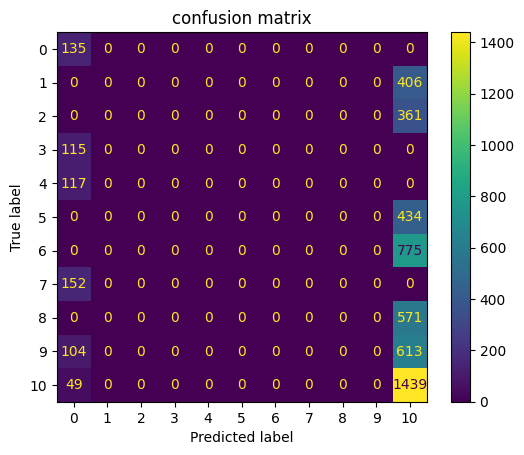

In [13]:
# We import the necessary libraries
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# We generate the confusion matrix
confusion = confusion_matrix(test_target, predict)
 
# Display of the confusion matrix                
figure = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion) #we transform the data into a visual form
figure.plot()
plt.title("confusion matrix")
plt.show()                                   #we display the transformed data

By looking at the matrix, we can see that the model tends to have a strong bias towards the Class 10. It is likely caused by the fact that the dataset contains a big proportion of class 10 tracks (around 30%) and a very unequal distribution for the other categories.

To get better results, a possibility could be to perform more advanced processing on the dataset. Perhaps by removing class 10 samples to reduce the bias but at the cost of a reduced quantity of data.
Another option would be to generate additional data for the unrepresented classes.